In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings("ignore")
import os

os.chdir('C:\Data\Jupyter_file\统计建模\连续变量降维')

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [3]:
df = pd.read_csv('profile_bank.csv')
df.head(2)

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
0,41360,34,3,3,9,49
1,52094,44,17,5,18,84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       100000 non-null  int64
 1   CNT_TBM  100000 non-null  int64
 2   CNT_ATM  100000 non-null  int64
 3   CNT_POS  100000 non-null  int64
 4   CNT_CSC  100000 non-null  int64
 5   CNT_TOT  100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X = iris.data
y = iris.target
kmeans = KMeans(n_clusters=3).fit(X)

AttributeError: 'KMeans' object has no attribute 'cluster_centers'

In [10]:
X[-3:]

array([[6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [6]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
kmeans.inertia_

78.85144142614602

In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

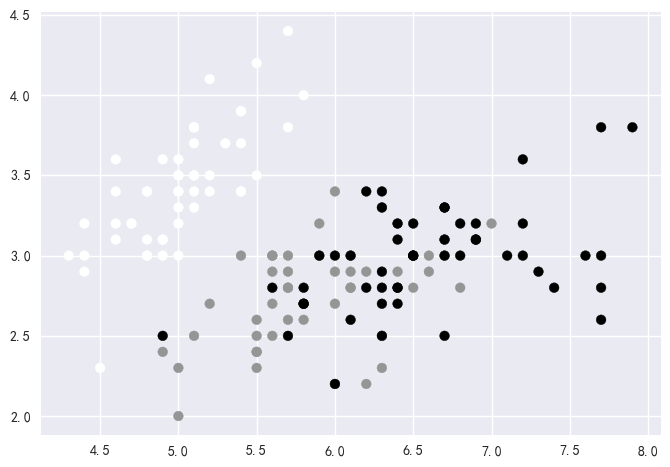

In [14]:
pre = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1] ,c = y)

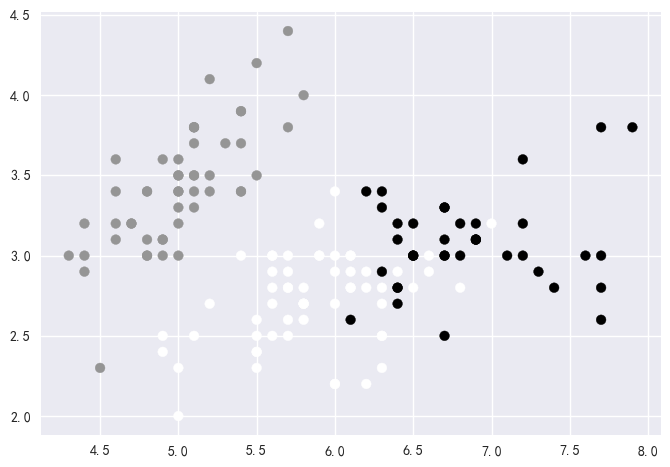

In [15]:
plt.scatter(X[:,0],X[:,1] ,c = pre)

In [16]:
from sklearn.cluster import AgglomerativeClustering
# 默认使用单链接算法
agg_cluster = AgglomerativeClustering(n_clusters=3).fit(X)
agg_cluster.n_leaves_ # 分层树的叶节点数量

150

In [19]:
agg_cluster.children_
agg_cluster.n_connected_components_

array([[101, 142],
       [  7,  39],
       [  0,  17],
       [  9,  34],
       [128, 132],
       [ 10,  48],
       [  4,  37],
       [ 19,  21],
       [ 29,  30],
       [ 57,  93],
       [ 80,  81],
       [116, 137],
       [  8,  38],
       [  3,  47],
       [ 27,  28],
       [ 82,  92],
       [ 95,  96],
       [127, 138],
       [  1,  45],
       [ 63,  91],
       [ 65,  75],
       [ 40, 152],
       [123, 126],
       [ 49, 151],
       [112, 139],
       [ 94,  99],
       [ 12, 168],
       [ 88, 166],
       [ 66,  84],
       [ 23,  26],
       [ 53,  89],
       [ 74,  97],
       [ 25, 153],
       [ 46, 157],
       [  2, 163],
       [110, 147],
       [120, 143],
       [136, 148],
       [ 78, 169],
       [ 69, 160],
       [ 54,  58],
       [140, 144],
       [141, 145],
       [ 43, 179],
       [ 68,  87],
       [ 50,  52],
       [ 51,  56],
       [107, 130],
       [105, 122],
       [103, 161],
       [164, 171],
       [ 20,  31],
       [ 11,

1

In [20]:
# 获取模型的参数
agg_cluster.get_params(deep=True)

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': None,
 'n_clusters': 3}

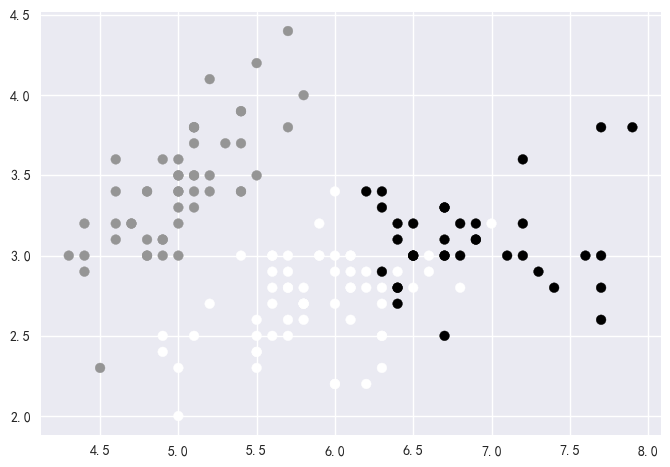

In [21]:
agg_pre = agg_cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1] ,c = agg_pre)

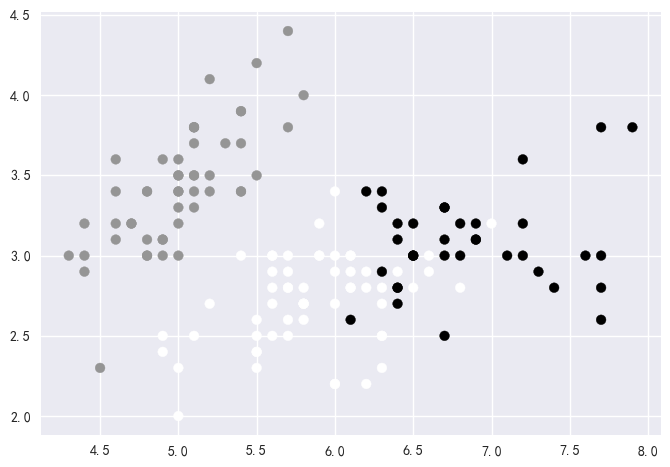

In [22]:
# 均链接
avg_agg= AgglomerativeClustering(n_clusters=3,linkage='average').fit(X)
avg_pre = avg_agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1] ,c = avg_pre)

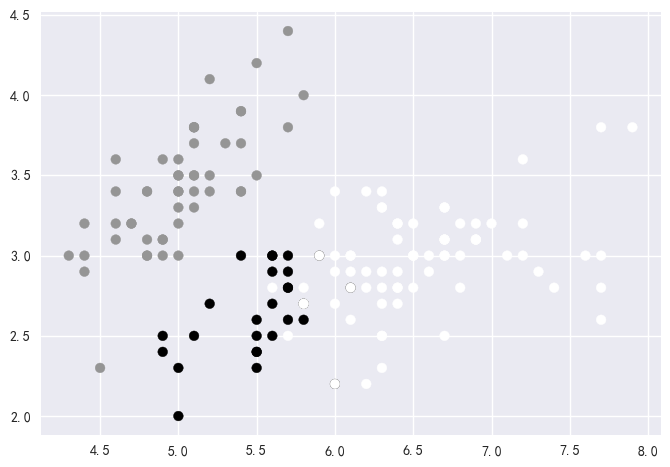

In [23]:
# 全链接
avg_agg= AgglomerativeClustering(n_clusters=3,linkage='complete').fit(X)
all_pre = avg_agg.fit_predict(X)
plt.scatter(X[:,0],X[:,1] ,c = all_pre)

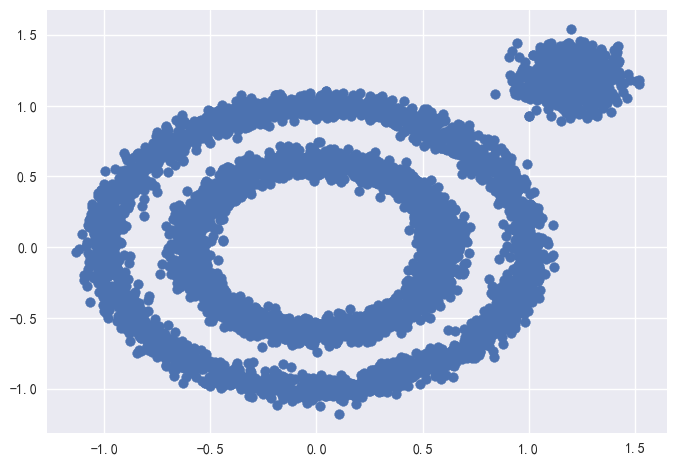

In [24]:
from sklearn.cluster import DBSCAN
# 生成两簇非凸数据
x1,y2 = datasets.make_blobs(n_samples=1000,n_features=2,centers=[[1.2,1.2]],cluster_std=[[.1]],random_state=9)
#  一簇对比数据
x2,y1 = datasets.make_circles(n_samples=5000,factor=.6,noise=.05)
x = np.concatenate((x1,x2))
plt.scatter(x[:,0],x[:,1],marker='o')

In [25]:
DBS = DBSCAN().fit(x)

In [26]:
# 核心样本点的位置
DBS.core_sample_indices_

array([   0,    1,    2, ..., 5997, 5998, 5999], dtype=int64)

In [31]:
DBS.labels_ # 只有一类

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

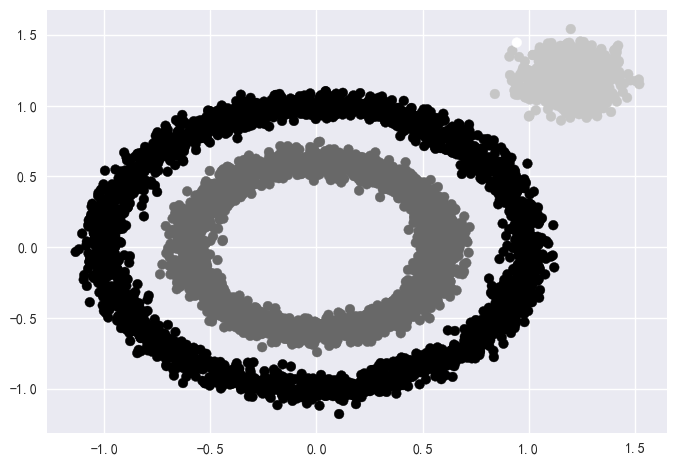

In [33]:
# 调整参数
pre = DBSCAN(eps=0.1,min_samples=12).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pre)

In [ ]:
pre = DBSCAN(eps=0.1,min_samples=12).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pre)

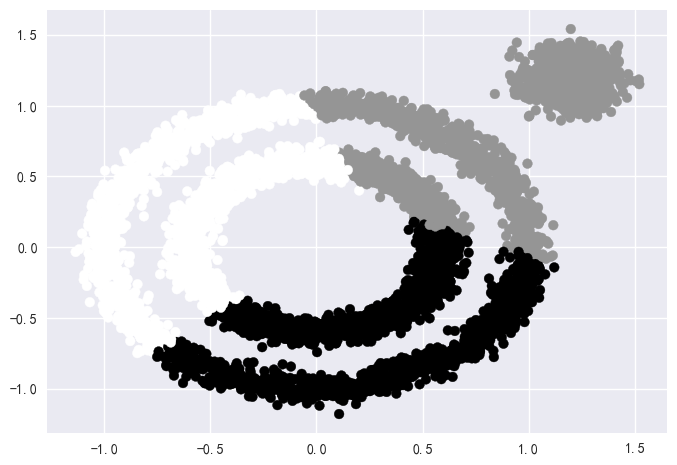

In [34]:
plt.scatter(x[:,0],x[:,1],c=KMeans(n_clusters=3).fit_predict(x))

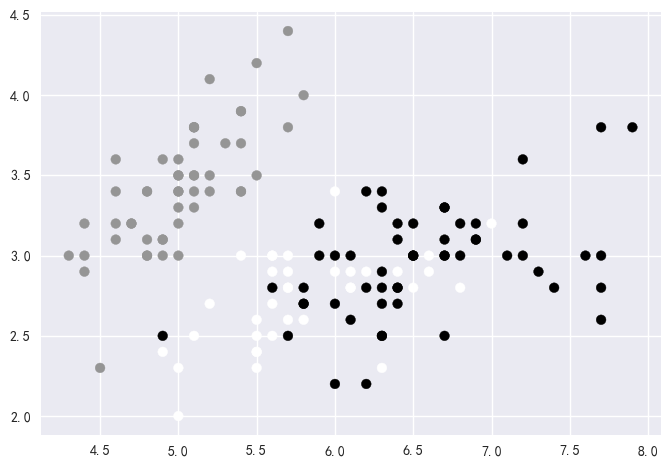

In [40]:
# 高斯混合模型 GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
pre = gmm.predict(X)
plt.scatter(X[:,0],X[:,1] ,c = pre)

In [43]:
data = df.iloc[:,1:]
data.head()

,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
0,34,3,3,9,49
1,44,17,5,18,84
2,122,26,32,36,216
3,42,3,6,1,52
4,20,15,2,2,39


In [44]:
from sklearn import preprocessing
st_data =preprocessing.scale(data)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(st_data)
pca.explained_variance_
pca.explained_variance_ratio_

PCA(n_components=3)

array([2.35145149, 1.22005478, 0.77115778])

array([0.47028559, 0.24400851, 0.15423001])

In [46]:
score_pca = pd.DataFrame(pca.fit_transform(st_data))
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(score_pca)
result.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [49]:
score_pca.head()

,0,1,2
0,-0.815671,0.307130,0.602497
1,-0.057540,-0.167273,1.028003
2,2.176502,-0.731008,1.572581
3,-0.948791,0.442923,-0.049188
4,-0.984169,0.053766,-0.003092


<AxesSubplot: >

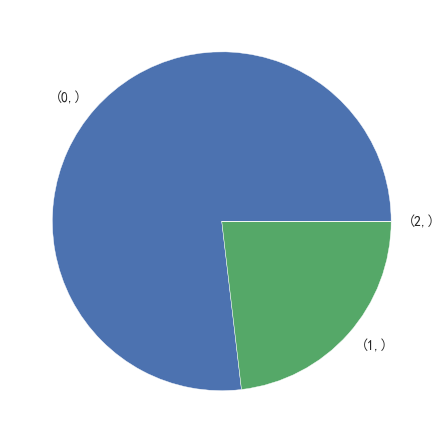

In [47]:
# 画图
pd.DataFrame(result.labels_).value_counts().plot(kind='pie')

In [50]:
# 因子分析
from fa_kit import FactorAnalysis
#实例化 对输入数据进行主成分的提取
fa=FactorAnalysis.load_data_samples(
    st_data,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#设定提取主成分的方式 使用top_n
fa.find_comps_to_retain(method="top_n",num_keep=3)
#最大方差法对因子进行旋转
fa.rotate_components(method="varimax")
# 查看因子权重 ，因子的载荷矩阵
pd.DataFrame(fa.comps['rot'])

array([0, 1, 2], dtype=int64)

,0,1,2
0,0.747452,-0.115976,-0.047857
1,-0.037732,0.681951,0.049022
2,0.017832,0.706256,-0.060504
3,-0.002143,-0.005555,0.993908
4,0.663001,0.150546,0.061583


<AxesSubplot: >

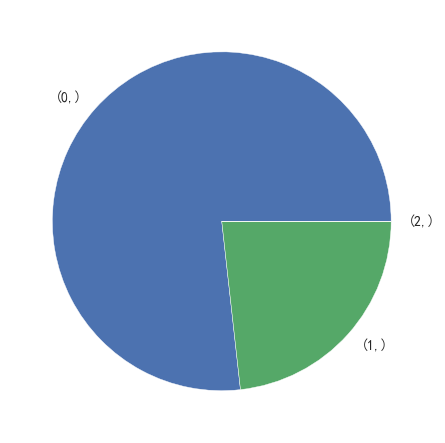

In [51]:
# 得分
score_fa = pd.DataFrame(fa.get_component_scores(st_data))
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(score_fa)
pd.DataFrame(result.labels_).value_counts().plot(kind='pie')

In [58]:
pd.DataFrame(result.labels_).value_counts()


0    76949
2    23043
1        8
dtype: int64

In [57]:
pd.DataFrame(kmeans.predict(st_data)).value_counts()

0    76949
2    23043
1        8
dtype: int64

In [65]:
# 均链接
avg_agg= AgglomerativeClustering(n_clusters=3,linkage='average').fit(data)
avg_pre = avg_agg.fit_predict(data)
pd.DataFrame(avg_pre).value_counts()

MemoryError: unable to allocate array data.

In [66]:
avg_pre[:3]

array([1, 1, 1], dtype=int64)

<AxesSubplot: >

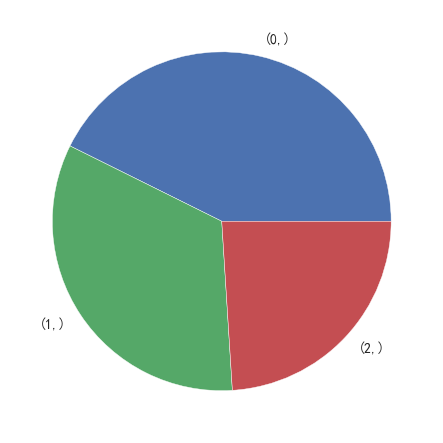

In [67]:
pd.DataFrame(avg_pre).value_counts().plot(kind='pie')

In [60]:
pd.DataFrame(avg_pre).value_counts()

0    64
1    50
2    36
dtype: int64

<AxesSubplot: >

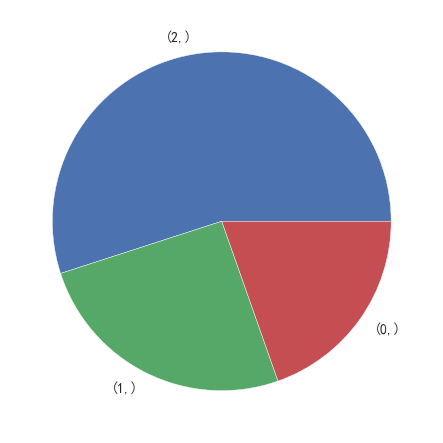

In [68]:
# 高斯混合模型 GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
pre = gmm.predict(data)
pd.DataFrame(pre).value_counts().plot(kind='pie')

<AxesSubplot: >

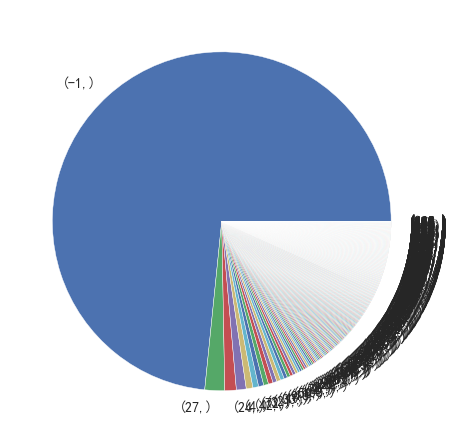

In [69]:
pre = DBSCAN(eps=0.1,min_samples=12).fit_predict(data)
pd.DataFrame(pre).value_counts().plot(kind='pie')

<AxesSubplot: >

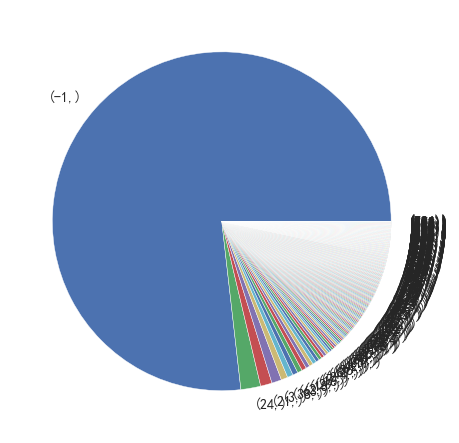

In [72]:
pre = DBSCAN(eps=0.05,min_samples=20).fit_predict(data)
pd.DataFrame(pre).value_counts().plot(kind='pie')